In [2]:
import os, random, shutil
import numpy as np
import pandas as pd
import PIL
#import keras
import itertools
from PIL import Image

import tensorflow as tf

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#from skimage import feature, data, io, measure
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 
from tqdm import tqdm
import cv2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import BatchNormalization
#from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard
import io
import time
import datetime
from tensorflow.keras.optimizers import Adam,Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import urllib

In [5]:
os.chdir("D:\\My ML Projects\\lenskart task")

In [3]:
df_train=pd.read_csv("lenskart_products_recruitment_challenge.csv")

In [4]:
df_train

,Unnamed: 0,product_name,product_id,parent_category,Image_Front,frame_shape
0,0,Vintage Persona C4,7641,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
1,1,Vintage Crazy-X C2 Red,7643,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
2,2,Jialedi Eyewear 1086 C8 Blue,8254,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
3,3,Jialedi Eyewear 1086 C6 Red,8255,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
4,4,Jialedi Eyewear 1086 C4 Tortoise Transperent,8256,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
...,...,...,...,...,...,...
5565,5565,Black White Full Rim Rectangle Vincent Chase O...,99444,Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
5566,5566,Maroon Full Rim Rectangle Vincent Chase Online...,99445,Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
5567,5567,Lenskart TOI Special: Black Blue Full Rim Rect...,99446,Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
5568,5568,Tortoise Full Rim Rectangle Vincent Chase Onli...,99447,Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle


In [20]:
'''
function to move the images to their corresponding folder
'''
wrong_url=[]
def move_files_train():
    for i, image in tqdm(df_train.iterrows()):
        try:
            os.chdir(f"D:\\My ML Projects\\lenskart task\\Data\\{image.parent_category}\\{image.frame_shape}")
            image_name=image.Image_Front.strip().split("/")[-1].split(".")[0]
            urllib.request.urlretrieve(image.Image_Front, f"{image.parent_category}_{image.frame_shape}_{image_name}.jpg")
            os.chdir("D:\\My ML Projects\\lenskart task")
        except:
            wrong_url.append(image.Image_Front)

In [21]:
#move_files_train()

In [22]:
#os.chdir("D:\\My ML Projects\\lenskart task\\Glasses")
for count, filename in enumerate(os.listdir()):
    dst ="Glass_" + str(count) + ".jpg"
    src = filename 
    #os.rename(src, dst)

## Model building

In [23]:
batch_size_train = 25
num_classes= 3
IMAGE_SIZE=[200,200]
classes_required = ['eyeframe','NonPowerReading','sunglasses']

In [29]:
datagen = ImageDataGenerator(rescale=1.0/255.0,
                             #shear_range = 0.2,
                             #zoom_range = 0.2
                            )

In [30]:
#Input the Training Data

train_path = 'D:/My ML Projects/lenskart task/train'
train_batches = datagen.flow_from_directory(train_path, target_size=(200,200), classes=classes_required, batch_size=batch_size_train)
type(train_batches)

Found 5254 images belonging to 3 classes.


tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [31]:
batchX, batchy = train_batches.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(25, 200, 200, 3), min=0.000, max=1.000


In [32]:
train_imgs, train_labels = next(train_batches)

In [33]:
train_imgs[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [34]:
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 64} ) 
sess = tf.compat.v1.Session(config=config) 
#keras.backend.set_session(sess)
tf.compat.v1.keras.backend.set_session(
    sess
)
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.333)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

### Model Architecture

In [35]:
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3), activation="relu" ,input_shape=IMAGE_SIZE + [3], padding='same'))

model.add(Conv2D(32, kernel_size=(3,3), activation="relu",padding='same'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.30))

model.add(Conv2D(64, kernel_size=(3,3), activation="relu",padding='same'))
#model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(128, kernel_size=(3,3), activation="relu",padding='same'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization()) 
model.add(Dropout(0.45))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      4640      
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0

In [37]:
# Complie the model
opt = Adadelta(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.fit_generator(train_batches, steps_per_epoch=25, epochs=100, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
25/25 [==============================] - 7s 291ms/step - loss: 1.7889 - accuracy: 0.3760
Epoch 2/100
25/25 [==============================] - 8s 318ms/step - loss: 1.6999 - accuracy: 0.4064
Epoch 3/100
25/25 [==============================] - 8s 302ms/step - loss: 1.5464 - accuracy: 0.4400
Epoch 4/100
25/25 [==============================] - 7s 297ms/step - loss: 1.4380 - accuracy: 0.4503
Epoch 5/100
25/25 [==============================] - 6s 248ms/step - loss: 1.2608 - accuracy: 0.4848
Epoch 6/100
25/25 [==============================] - 6s 260ms/step - loss: 1.2449 - accuracy: 0.5104
Epoch 7/100
25/25 [==============================] - 7s 267ms/step - loss: 1.2403 - accuracy: 0.5296
Epoch 8/100
25/25 [==============================] - 7s 262ms/step - loss: 1.1671 - accuracy: 0.5568
Epoch 9/100
25/25 [==============================] - 6s 256ms/step - loss: 1.0820 - accuracy: 0.5456
Epoch 10/100
25

In [39]:
model.save("model_Glass_25_batch.h5")
print("Saved model to disk")

Saved model to disk


# Please load the trained model here

In [40]:
#Load Model
from tensorflow.keras.models import load_model
model_loaded = load_model('model_Glass_25_batch.h5')

In [42]:
import cv2

In [71]:
test_img=cv2.imread("D:\\My ML Projects\\lenskart task\\test\\test3.jpg")
test_img=cv2.resize(test_img,(200,200))
test_img = test_img.astype('float32')
# normalize to the range 0-1
test_img /= 255.0

test_image_for_view=np.array(test_img)
test_image = np.expand_dims(test_image_for_view, axis=0)

preds=model_loaded.predict(test_image)
final_pred=list(np.argmax(preds, axis=1))[0]

In [72]:
Ans=np.where(final_pred==0, "eyeframe",
         (np.where(final_pred==1,"Non-Power Reading",
         "sunglasses"))).item()
print("Glass type is "+str(Ans))

Glass type is sunglasses


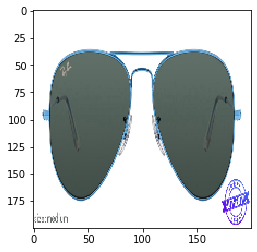

In [73]:
plt.imshow(test_image_for_view)